<div id="container" style="position:relative;">
<div style="float:left"><h1> Forecasting Bakery Sales - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

# Notebook 3 : Bakery Data Cleaning



This notebook will import all the raw shop datasets, combine them into one dataframe and explore the datasets to ensure they are clean. The datasets will be checked for. 

* **Formatting**
* **Validity** 
* **Duplicate and redundant data**
* **Missing data** 
* **Correct datatypes**

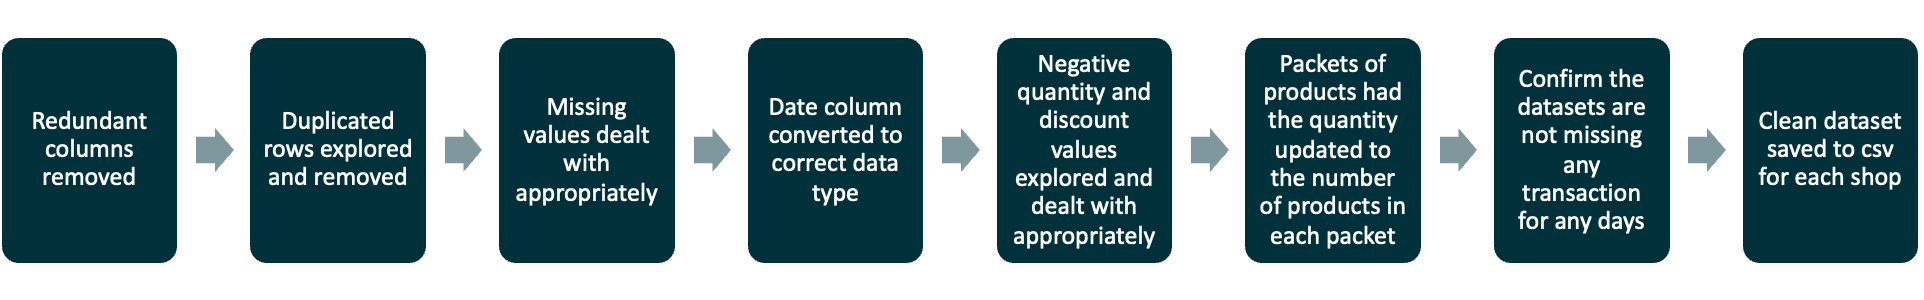

---

# Contents 
     
1. [Cleaning Aldeburgh Shop Data](#Cleaning-Aldeburgh-Shop-Data)
      - [Initial EDA](#Aldeburgh-Initial-EDA) 
      - [Further EDA and Cleaning](#Aldeburgh-Further-EDA-and-Cleaning)
      - [Summary of Clean Aldeburgh Data](#Summary-of-Clean-Aldeburgh-Data)


1. [Cleaning Southwold Shop Data](#Cleaning-Southwold-Shop-Data)
      - [Initial EDA](#Southwold-Initial-EDA) 
      - [Further EDA and Cleaning](#Southwold-Further-EDA-and-Cleaning)
      - [Summary of Clean Southwold Data](#Summary-of-Clean-Southwold-Data)
      
      
2. [Cleaning Darsham Shop Data](#Cleaning-Darsham-Shop-Data)
      - [Initial EDA](#Darsham-Initial-EDA) 
      - [Further EDA and Cleaning](#Darsham-Further-EDA-and-Cleaning)
      - [Summary of Clean Darsham Data](#Summary-of-Clean-Darsham-Data)
      
      
3. [Cleaning Norwich Shop Data](#Cleaning-Norwich-Shop-Data)
      - [Initial EDA](#Norwich-Initial-EDA) 
      - [Further EDA and Cleaning](#Norwich-Further-EDA-and-Cleaning)
      - [Summary of Clean Norwich Data](#Summary-of-Clean-Norwich-Data)


4. [Cleaning Summary](#Cleaning-Summary)

5. [Next Steps](#Next-Steps)

---

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt
import time
import os

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## To Get Current Directory

In [3]:
working_directory = os.getcwd()

## Dictionary Required

In [4]:
packet_products_dictionary ={21139258:2, 21139127:2, 21139133:2,10027913:4, 10027916:6, 21139182:2, 10029435:6,
                 10029439:8, 21139291:2, 10029409:6, 10029413:8, 23278184:3, 24359230:2, 24678085:2,
                 10025080:4, 10025703:6, 21139178:2}

---

# Cleaning Aldeburgh Shop Data

In [5]:
# The raw aldeburgh dataset is imported
raw_aldeburgh = pd.read_csv(working_directory+'/1_raw_data/shop/aldeburgh_raw_data.csv')

## Aldeburgh Initial EDA

In [6]:
# To get an initial view of the dataframe: 
bakery.initial_eda(raw_aldeburgh)

There are 23 columns and 725508 rows 

The first 5 rows are:


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
0,1253728186,368106156,1677551,2.0,2.0,0.25,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253728186, 'TaxRateId'...",[],False,2021-07-01T08:01:17.303
1,1253728185,368106156,5453564,2.2,2.2,0.14,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253728185, 'TaxRateId'...",[],False,2021-07-01T08:01:17.303
2,1253729067,368106492,1677390,2.8,2.8,0.34,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253729067, 'TaxRateId'...",[],False,2021-07-01T08:07:40.13
3,1253729066,368106492,5453564,2.2,2.2,0.14,NaN,0.0,3,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253729066, 'TaxRateId'...",[],False,2021-07-01T08:07:40.13
4,1253729065,368106492,1677554,2.2,2.2,0.38,NaN,0.0,2,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253729065, 'TaxRateId'...",[],False,2021-07-01T08:07:40.13



The final 5 rows are: 


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
725503,1639412078,467615962,21918560,4.40,4.40000,0.00,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639412078, 'TaxRateId'...",[],False,2022-09-30T17:19:54.387
725504,1639412075,467615962,8981483,2.30,2.30000,0.00,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639412075, 'TaxRateId'...",[],False,2022-09-30T17:19:54.387
725505,1639421047,467618772,18379592,2.75,2.75000,0.00,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639421047, 'TaxRateId'...",[],False,2022-09-30T17:31:59.757
725506,1639421046,467618772,1677387,3.60,3.00000,0.34,NaN,0.60,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639421046, 'TaxRateId'...",[],False,2022-09-30T17:31:59.757
725507,1639421045,467618772,1677392,2.80,2.33333,0.36,NaN,0.47,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639421045, 'TaxRateId'...",[],False,2022-09-30T17:31:59.757



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725508 entries, 0 to 725507
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       725508 non-null  int64  
 1   TransactionId            725508 non-null  int64  
 2   ProductId                725508 non-null  int64  
 3   UnitPrice                725508 non-null  float64
 4   UnitPriceExcTax          725508 non-null  float64
 5   CostPrice                725508 non-null  float64
 6   TaxGroupId               0 non-null       float64
 7   TaxAmount                725508 non-null  float64
 8   Quantity                 725508 non-null  int64  
 9   DiscountAmount           2772 non-null    float64
 10  DiscountReasonId         2772 non-null    float64
 11  DiscountAmountExcTax     2772 non-null    float64
 12  RefundReasonId           734 non-null     float64
 13  Notes                    72248 non-null   object 
 14  Pri

None

## Initial Observations

It can be see from this initial view:
- There are 725,508 rows and 23 columns
- There are 4 columns that are completely empty 
- There are a lot of columns that don't provide any insight into the sales or are nonsensical, such as `Taxes` and `MultipleChoiceItems` 
- The Date column is an object type, so will need to be converted to DateTime

For this analysis and model only the columns `TransactionId`, `ProductId`, `UnitPrice`, `Quantity` `DiscountAmount`, `DiscountReasonId`, `RefundReasonId` and `Date` are required. Therefore a copy of the data with only the required columns will be made and stored to `aldeburgh_df` and explored further. 

## Aldeburgh Further EDA and Cleaning

In [7]:
# A copy of the data is made with the required columns 
aldeburgh_df = raw_aldeburgh[["TransactionId", "ProductId", "UnitPrice", 
                              "Quantity", "DiscountAmount", "DiscountReasonId", "RefundReasonId", "Date"]].copy()

In [8]:
bakery.further_eda(aldeburgh_df)

There are 8 columns and 725508 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725508 entries, 0 to 725507
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     725508 non-null  int64  
 1   ProductId         725508 non-null  int64  
 2   UnitPrice         725508 non-null  float64
 3   Quantity          725508 non-null  int64  
 4   DiscountAmount    2772 non-null    float64
 5   DiscountReasonId  2772 non-null    float64
 6   RefundReasonId    734 non-null     float64
 7   Date              725508 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 44.3+ MB


None


The number of missing values in each column are:


TransactionId            0
ProductId                0
UnitPrice                0
Quantity                 0
DiscountAmount      722736
DiscountReasonId    722736
RefundReasonId      724774
Date                     0
dtype: int64


There are 81537 duplicated rows of data in the dataset



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,7.255080e+05,7.255080e+05,725508.000000,725508.000000,2772.000000,2772.000000,734.000000
mean,3.975766e+08,8.000342e+06,3.110591,1.182188,1.949152,29976.509019,16685.662125
std,4.425681e+07,8.263534e+06,1.568446,0.541949,1.947115,22761.737986,4762.632595
min,3.252886e+08,1.677384e+06,0.000000,-7.000000,-5.000000,13524.000000,8378.000000
25%,3.572482e+08,1.677432e+06,2.300000,1.000000,0.567500,13524.000000,11273.000000
50%,3.929748e+08,1.677674e+06,2.800000,1.000000,1.950000,19614.000000,19849.000000
75%,4.393701e+08,1.513794e+07,3.350000,1.000000,3.000000,49063.000000,19849.000000
max,4.676188e+08,2.526304e+07,90.000000,25.000000,20.000000,84981.000000,19849.000000


## Further Observations

- There are some missing values in `DiscountAmount`, `DiscountReasonId` and `RefundReasonId`
- There are 81,537 duplicated rows that need further analysis into
- `Quantity` column has up to -7, which indicates an error in the data as the column should only contain positive values
- `DiscountAmount` has some negative amounts, which again indicates an error as the column should only contain positive values 
- The `Date` column is the incorrect data type

Each of these points will be further explored and dealt with appropriately. 

## Exploring Duplicated Rows

First the duplicated rows will be explored to determine if they are true duplicates that need dropping or if there is another reason for them. This will be done taking a copy of the data and storing it to `duplicated_rows`.

In [9]:
duplicated_rows = aldeburgh_df[aldeburgh_df.duplicated()].copy()
duplicated_rows

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
68,368148672,1677427,3.20,1,NaN,NaN,NaN,2021-07-01T12:00:55.233
141,368119840,1677429,2.50,1,NaN,NaN,NaN,2021-07-01T10:03:00.993
142,368119840,1677432,3.00,1,NaN,NaN,NaN,2021-07-01T10:03:00.993
143,368119840,1677432,3.00,2,NaN,NaN,NaN,2021-07-01T10:03:00.993
158,368137522,1677426,2.90,1,NaN,NaN,NaN,2021-07-01T11:19:41.713
...,...,...,...,...,...,...,...,...
725503,467615962,21918560,4.40,1,NaN,NaN,NaN,2022-09-30T17:19:54.387
725504,467615962,8981483,2.30,1,NaN,NaN,NaN,2022-09-30T17:19:54.387
725505,467618772,18379592,2.75,1,NaN,NaN,NaN,2022-09-30T17:31:59.757
725506,467618772,1677387,3.60,1,NaN,NaN,NaN,2022-09-30T17:31:59.757


Looking at the data, as there is a unique `TransactionId` for each row of data, there should be no duplicated rows and this may have arisen from the API downloading the data in sections and therefore duplicated some rows. Therefore, the duplicated rows will be removed from the dataset using `drop_duplicates()` method. 

This will be stored in a new variable `aldeburgh_clean` which will have all the remaining cleaning steps carried out on. 

In [10]:
# A copy of the dataset is taken 
aldeburgh_clean = aldeburgh_df.copy()

# The duplicated rows are dropped 
aldeburgh_clean.drop_duplicates(inplace=True)

In [11]:
# To validate the rows were dropped correctly
aldeburgh_clean.duplicated().sum()

0

## Exploring Null Values

In [12]:
aldeburgh_clean.isna().sum()

TransactionId            0
ProductId                0
UnitPrice                0
Quantity                 0
DiscountAmount      641488
DiscountReasonId    641488
RefundReasonId      643273
Date                     0
dtype: int64

It can be seen that there are 641,488 null values in the `DiscountAmount` and `DiscountReasonId` columns and 419,015 null values in the `RefundReasonId` column. 

However, these aren't true missing values but rather where the transaction taken place has not had a discount or refund applied. As missing values are not suitable for modelling they will be filled with the value 0, using `.fillna` method, to indicate no discount or refund has occured. 

In [13]:
# A list of the columns with missing values is created
null_columns = ['DiscountAmount','DiscountReasonId','RefundReasonId']

for column in null_columns:
    
    # the null values are filled with 0 using fillna 
    aldeburgh_clean[column].fillna(0,inplace=True)

In [14]:
# To validate that all null values were filled:
aldeburgh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643971 entries, 0 to 708497
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     643971 non-null  int64  
 1   ProductId         643971 non-null  int64  
 2   UnitPrice         643971 non-null  float64
 3   Quantity          643971 non-null  int64  
 4   DiscountAmount    643971 non-null  float64
 5   DiscountReasonId  643971 non-null  float64
 6   RefundReasonId    643971 non-null  float64
 7   Date              643971 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 44.2+ MB


## Correcting the `Date` Column Data Type

In addition to changing the `Date` column to be a DateTime datatype, the date and time column will be split into two columns, as later on in the modelling the dataset needs to be able to be grouped by the `Date` only. This is done using the `.split()` method. 

In [15]:
aldeburgh_clean['Date']

0         2021-07-01T08:01:17.303
1         2021-07-01T08:01:17.303
2          2021-07-01T08:07:40.13
3          2021-07-01T08:07:40.13
4          2021-07-01T08:07:40.13
                   ...           
708493    2022-09-30T17:19:54.387
708494    2022-09-30T17:19:54.387
708495    2022-09-30T17:31:59.757
708496    2022-09-30T17:31:59.757
708497    2022-09-30T17:31:59.757
Name: Date, Length: 643971, dtype: object

In [16]:
# To split the Date column into Date and Time
aldeburgh_clean[['Date', 'Time']] = aldeburgh_clean.Date.str.split('T',expand=True)

#To validate it split correctly
aldeburgh_clean.head()

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date,Time
0,368106156,1677551,2.0,1,0.0,0.0,0.0,2021-07-01,08:01:17.303
1,368106156,5453564,2.2,1,0.0,0.0,0.0,2021-07-01,08:01:17.303
2,368106492,1677390,2.8,1,0.0,0.0,0.0,2021-07-01,08:07:40.13
3,368106492,5453564,2.2,3,0.0,0.0,0.0,2021-07-01,08:07:40.13
4,368106492,1677554,2.2,2,0.0,0.0,0.0,2021-07-01,08:07:40.13


For the modelling the `Time` column is not required as the forecast is at a daily level, therefore this column can be dropped using the `.drop()` method. 

In [17]:
aldeburgh_clean.drop(columns=['Time'],inplace=True)

In [18]:
aldeburgh_clean['Date']=aldeburgh_clean['Date'].astype('datetime64')
aldeburgh_clean=aldeburgh_clean.sort_values('Date')

# Validate the Time column has been dropped and the Date is the correct datatype
aldeburgh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643971 entries, 465159 to 708497
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     643971 non-null  int64         
 1   ProductId         643971 non-null  int64         
 2   UnitPrice         643971 non-null  float64       
 3   Quantity          643971 non-null  int64         
 4   DiscountAmount    643971 non-null  float64       
 5   DiscountReasonId  643971 non-null  float64       
 6   RefundReasonId    643971 non-null  float64       
 7   Date              643971 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 44.2 MB


## Reviewing the `Quantity` Column for Negative Values

From the `.describe()` method it was seen that there were some negative values in the `Quantity` column. This is most likely due to the product being refunded and therefore the quantity was recorded as negative. 

However, for the modelling the total quantity for each product is being forecasted. This includes products that were refunded, as they still class as a product demand. Therefore, for all negative quantity values will be converted to positive ones using the `abs()` function. 

In [19]:
# To get the rows of data that have negative quantities 
negative_quant = aldeburgh_clean[aldeburgh_clean['Quantity']<0]
negative_quant

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
465177,325377620,1677709,7.00,-1,0.0,0.0,19849.0,2020-09-01
465324,325371584,21644677,7.80,-1,0.0,0.0,11273.0,2020-09-01
465604,325382787,18610844,5.40,-1,0.0,0.0,8378.0,2020-09-01
467409,325763436,21139182,3.80,-1,0.0,0.0,8378.0,2020-09-03
466484,325675165,1677709,7.00,-1,0.0,0.0,19849.0,2020-09-03
...,...,...,...,...,...,...,...,...
428407,463371211,1677622,2.75,-1,0.0,0.0,19849.0,2022-09-09
430039,463688673,24835085,2.60,-1,0.0,0.0,8378.0,2022-09-10
430038,463688673,1677539,2.30,-1,0.0,0.0,8378.0,2022-09-10
441477,465908331,1677480,4.80,-1,0.0,0.0,19849.0,2022-09-22


It can be seen from this inital glance that the transaction rows with negative quantity values contain a `RefundReasonId` and therefore are negative because they have been refunded. However, for the model they will be converted into positive values as they were still technically a sale and demand for that product. 

In [20]:
# The abs function is used to change the negative quantity values to positive ones 
for row in negative_quant.index:
    aldeburgh_clean.loc[row,'Quantity'] = abs(aldeburgh_clean.loc[row,'Quantity'])

In [21]:
# To validate that there are no remaining negative quantities 
validate_refund = aldeburgh_clean[aldeburgh_clean['Quantity']<0]
validate_refund

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date


## Reviewing the `DiscountAmount` Column for Negative Values

From the `.describe()` method it was seen that there were some negative values in the `DiscountAmount` column. Haven't spoken with the owner this is considered an error in the data and the values should be converted to positive ones. 

Therefore, for all negative DiscountAmount values will be converted to positive ones using the `abs()` function. 

In [22]:
# To get the rows of data that have negative discount amounts 
negative_discount = aldeburgh_clean[aldeburgh_clean['DiscountAmount']<0]
negative_discount

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
579127,347356703,22351131,60.0,1,-5.00,13524.0,0.0,2021-02-11
616847,352470189,22696975,5.5,1,-1.50,13524.0,0.0,2021-04-14
619665,352867793,21910972,9.7,1,-4.00,13524.0,0.0,2021-04-16
619674,352914136,1677519,8.0,1,-4.00,13524.0,0.0,2021-04-16
619673,352914136,21910969,10.5,1,-4.00,13524.0,0.0,2021-04-16
...,...,...,...,...,...,...,...,...
625741,353954667,21910972,9.7,1,-4.00,19614.0,0.0,2021-04-23
625742,353954667,1677519,8.0,1,-4.00,13524.0,0.0,2021-04-23
2824,368701546,13405926,2.6,1,-0.40,13524.0,0.0,2021-07-03
45070,376647937,23373978,8.0,1,-3.00,13524.0,0.0,2021-08-06


In [23]:
# The abs function is used to change the negative quantity values to positive ones 
for row in negative_discount.index:
    aldeburgh_clean.loc[row,'DiscountAmount'] = abs(aldeburgh_clean.loc[row,'DiscountAmount'])

In [24]:
# To validate there are no negative discount amounts remaining
validate_discount = aldeburgh_clean[aldeburgh_clean['DiscountAmount']<0]
validate_discount

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date


## Accounting for Packets of Products
From the ProductList dataset certain products are sold in packets ranging in size from 2-6. This product IDs were identified and the value of products stored in a dictionary called `packet_products_dictionary` at the top of the notebook. 

For this model as the individual number for each product is being forecasted, the packeted products need to show the number of individual products it contains, not a quantity of 1 for the packet being sold. Therefore, a for loop is generated to convert the `Quantity` of each packet product to the correct value from the `packet_products_dictionary`. 

In [25]:
#for loop to identify data rows that correspond to a ProductId that is a packet of products and update the quantity
for key in packet_products_dictionary.keys():
    aldeburgh_clean.loc[aldeburgh_clean['ProductId']==key, 'Quantity']=packet_products_dictionary[key]

In [26]:
# To validate it has worked one of the ProductId is selected to confirm the Quantity has updated to the correct amount
aldeburgh_clean[aldeburgh_clean['ProductId']==10025080]

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
125667,392654406,10025080,11.0,4,0.0,0.0,0.0,2021-10-14


## Validating All the Dates are Present in the Aldeburgh Dataset
The length of days between 01/09/2020-30/09/2022 is 760 days. However, all the bakeries were shut for 2 Christmas Day's, the Queen's funeral and additional days for refurbishment so should be fewer days long. 
This is validated using the `value_counts()` method on the `Date` column.

In [27]:
aldeburgh_clean['Date'].value_counts()

2022-08-29    1649
2022-08-15    1621
2022-06-03    1616
2022-08-28    1585
2022-08-20    1581
              ... 
2020-12-03     248
2021-02-10     241
2021-01-11     228
2021-01-14     207
2021-02-07     198
Name: Date, Length: 753, dtype: int64

It can be seen that Aldeburgh has transactions for a total of 753 day. Speaking to the owner it was verified that the shop was closed for 3 additional days in the summer for a refurbishment. Therefore, all days that have transactions are accounted for in the dataset. However, for timeseries modelling there cannot be any missing days in the dataset. Therefore, these dates will be added in the processing phase where the values can be interpolated as the `Date` column will be indexed. 

## Summary of Clean Aldeburgh Data

In [28]:
bakery.clean_summary(aldeburgh_clean)

There are 8 columns and 643971 rows

The number of duplicated rows are: 0

The number of missing values are:
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643971 entries, 465159 to 708497
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     643971 non-null  int64         
 1   ProductId         643971 non-null  int64         
 2   UnitPrice         643971 non-null  float64       
 3   Quantity          643971 non-null  int64         
 4   DiscountAmount    643971 non-null  float64       
 5   DiscountReasonId  643971 non-null  float64       
 6   RefundReasonId    643971 non-null  float64       
 7   Date              643971 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4

None

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,6.439710e+05,6.439710e+05,643971.000000,643971.000000,643971.000000,643971.000000,643971.000000
mean,3.940195e+08,8.056798e+06,3.103564,1.197240,0.008299,108.973092,18.019108
std,4.214542e+07,8.267632e+06,1.563507,0.553623,0.170611,2186.375500,569.306919
min,3.252886e+08,1.677384e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.561662e+08,1.677435e+06,2.300000,1.000000,0.000000,0.000000,0.000000
50%,3.892049e+08,1.677674e+06,2.750000,1.000000,0.000000,0.000000,0.000000
75%,4.318267e+08,1.513794e+07,3.350000,1.000000,0.000000,0.000000,0.000000
max,4.676188e+08,2.526304e+07,90.000000,25.000000,20.000000,84981.000000,19849.000000


All the columns are now in the correct format, with the correct columns and with no duplicate values. 
- There are 643,971 transactions
- There are 2,479 discounted products over the timeframe
- There are 608 refunded products over the timeframe
- The data runs from 01/09/2020 - 30/09/2022 and all dates transactions occured for are accounted for

A copy of the clean dataset is explorted as csv. 

---

## Exporting the Clean Aldeburgh Data to CSV

In [29]:
aldeburgh_clean.to_csv(working_directory+'/2_clean_data/aldeburgh_clean.csv', index=False)

In [30]:
# To validate it saved correctly 
aldeburgh_clean_check = pd.read_csv(working_directory+'/2_clean_data/aldeburgh_clean.csv')
aldeburgh_clean_check

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,325356083,21567882,3.2,1,0.00,0.0,0.0,2020-09-01
1,325399103,1677432,2.6,1,0.00,0.0,0.0,2020-09-01
2,325400582,20505962,4.5,1,2.25,13524.0,0.0,2020-09-01
3,325400582,15137944,1.8,1,0.00,0.0,0.0,2020-09-01
4,325403315,20405549,3.4,1,0.00,0.0,0.0,2020-09-01
...,...,...,...,...,...,...,...,...
643966,467514629,1677432,3.0,2,0.00,0.0,0.0,2022-09-30
643967,467514629,1677667,0.5,1,0.00,0.0,0.0,2022-09-30
643968,467514725,24895511,2.2,1,0.00,0.0,0.0,2022-09-30
643969,467514122,1677395,3.0,1,0.00,0.0,0.0,2022-09-30


---

# Remaining Shops Cleaning

For the remaining shops, as the assumptions around duplicated rows, missing values, packets of products and negative quantities and discount amounts are the same, a function called `shop_clean` has been created to complete all these steps. 

# Cleaning Southwold Shop Data

In [31]:
# The raw dataset is imported
raw_southwold = pd.read_csv(working_directory+"/1_raw_data/shop/southwold_raw_data.csv")

## Southwold Initial EDA

In [32]:
# Initial view of the raw dataset is taken
bakery.initial_eda(raw_southwold)

There are 23 columns and 597659 rows 

The first 5 rows are:


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
0,1253733717,368108160,1677386,2.60,2.60,0.34,NaN,0.0,1,NaN,...,decaff 1 SHOT,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253733717, 'TaxRateId'...",[],False,2021-07-01T08:33:19.79
1,1253733716,368108160,1677386,2.60,2.60,0.34,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253733716, 'TaxRateId'...",[],False,2021-07-01T08:33:19.79
2,1253759322,368116614,1677402,2.85,2.85,0.38,NaN,0.0,1,NaN,...,milk SKINNY,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253759322, 'TaxRateId'...",[],False,2021-07-01T09:43:11.287
3,1253773157,368121026,1677395,2.70,2.70,0.34,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253773157, 'TaxRateId'...",[],False,2021-07-01T10:09:05.577
4,1253773156,368121026,9262077,2.40,2.40,0.00,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253773156, 'TaxRateId'...",[],False,2021-07-01T10:09:05.577



The final 5 rows are: 


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
597654,1639377660,467605613,1677392,2.80,2.33333,0.36,NaN,0.42,1,0.28,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639377660, 'TaxRateId'...",[],False,2022-09-30T16:36:34.52
597655,1639378855,467605899,1677390,3.60,3.00000,0.34,NaN,0.60,1,NaN,...,y,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639378855, 'TaxRateId'...","[{'Id': 1639378860, 'TransactionId': 467605899...",False,2022-09-30T16:37:44.477
597656,1639378858,467605899,1677389,3.25,2.70833,0.34,NaN,1.08,2,NaN,...,y,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639378858, 'TaxRateId'...",[],False,2022-09-30T16:37:44.477
597657,1639395071,467610957,1677386,3.25,2.70833,0.34,NaN,0.54,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639395071, 'TaxRateId'...",[],False,2022-09-30T16:59:02.163
597658,1639395083,467610957,13017884,2.20,2.20000,0.00,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639395083, 'TaxRateId'...",[],False,2022-09-30T16:59:02.163



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597659 entries, 0 to 597658
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       597659 non-null  int64  
 1   TransactionId            597659 non-null  int64  
 2   ProductId                597659 non-null  int64  
 3   UnitPrice                597659 non-null  float64
 4   UnitPriceExcTax          597659 non-null  float64
 5   CostPrice                597659 non-null  float64
 6   TaxGroupId               0 non-null       float64
 7   TaxAmount                597659 non-null  float64
 8   Quantity                 597659 non-null  int64  
 9   DiscountAmount           6200 non-null    float64
 10  DiscountReasonId         6196 non-null    float64
 11  DiscountAmountExcTax     6200 non-null    float64
 12  RefundReasonId           808 non-null     float64
 13  Notes                    52650 non-null   object 
 14  Pri

None

## Initial Observations: 
- There are 597,659 rows and 23 columns
- Some of the columns have no data and therefore are redundant
- `Date` column is the incorrect data type
- As only the columns `TransactionId`, `ProductId`, `UnitPrice`, `Quantity` `DiscountAmount`, `DiscountReasonId`, `RefundReasonId` and `Date` are required, these will be saved to a new dataframe called `southwold_df` using the `.copy()` method

## Southwold Further EDA and Cleaning

In [33]:
southwold_df = raw_southwold[["TransactionId", "ProductId", "UnitPrice", 
                              "Quantity", "DiscountAmount", "DiscountReasonId", "RefundReasonId", "Date"]].copy()

In [34]:
# Further exploration into the new dataset containing the relevant columns 
bakery.further_eda(southwold_df)

There are 8 columns and 597659 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597659 entries, 0 to 597658
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     597659 non-null  int64  
 1   ProductId         597659 non-null  int64  
 2   UnitPrice         597659 non-null  float64
 3   Quantity          597659 non-null  int64  
 4   DiscountAmount    6200 non-null    float64
 5   DiscountReasonId  6196 non-null    float64
 6   RefundReasonId    808 non-null     float64
 7   Date              597659 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 36.5+ MB


None


The number of missing values in each column are:


TransactionId            0
ProductId                0
UnitPrice                0
Quantity                 0
DiscountAmount      591459
DiscountReasonId    591463
RefundReasonId      596851
Date                     0
dtype: int64


There are 44904 duplicated rows of data in the dataset



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,5.976590e+05,5.976590e+05,597659.000000,597659.000000,6200.000000,6196.000000,808.000000
mean,3.956501e+08,8.224032e+06,3.051376,1.205323,1.771289,32921.180600,18481.883663
std,4.317789e+07,8.211360e+06,1.454339,0.596373,1.188614,25560.701932,3311.990360
min,3.252885e+08,1.677384e+06,0.000000,-15.000000,-2.300000,13524.000000,8378.000000
25%,3.563148e+08,1.677480e+06,2.300000,1.000000,0.537500,13524.000000,19849.000000
50%,3.911956e+08,1.677680e+06,2.700000,1.000000,1.950000,19614.000000,19849.000000
75%,4.350012e+08,1.513794e+07,3.400000,1.000000,2.450000,49063.000000,19849.000000
max,4.676110e+08,2.526304e+07,60.000000,33.000000,12.500000,84981.000000,19849.000000


## Further Observations

- There are some missing values in `DiscountAmount`, `DiscountReasonId` and `RefundReasonId`
- There are 44,904 duplicated rows that need dropping
- `Quantity` column has up to -15, which indicates an error in the data that needs converting to positive 
- `DiscountAmount` has some negative amounts, which again indicates an error as the column that needs converting to positive 
- Date column needs to be formatted to DateTime
- Packet products need to be accounted for
- There are 4 rows of data that have discounted amounts but not discounted reasons that need exploring

All these cleaning steps will occur using the `shop_clean` function, on a new copy of the data set called `southwold_clean`. The negative quantity and discount amount columns are also stored as `negative_quantity` and `negative_discount` respectively to be entered into the fnuction. 

## Exploring the 4 Missing Values in the `DiscountAmountId` Column 

In [35]:
# A copy of the dataset is made and called southwold_clean
southwold_clean = southwold_df.copy()

# The variables containing the correct data rows required for the function are created 
negative_quantity = southwold_clean[southwold_clean['Quantity']<0]
negative_discount = southwold_clean[southwold_clean['DiscountAmount']<0]

In [36]:
# The missing ID values are explored by identifying rows that have discounted amounts and are null in the id column
discount_rows = southwold_clean[southwold_clean['DiscountAmount']>0]
missing_id = discount_rows[discount_rows['DiscountReasonId'].isna()]
missing_id

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
278430,443668196,22197399,1.0,1,0.50,NaN,NaN,2022-06-14T15:54:06.2
278599,443665157,13405911,3.0,1,1.50,NaN,NaN,2022-06-14T15:41:32.763
278826,443671813,8981483,2.3,1,1.15,NaN,NaN,2022-06-14T16:07:05.54
278872,443656346,13405911,3.0,1,1.50,NaN,NaN,2022-06-14T15:05:10.14


For the modelling phase the `DiscountReasonId` is being converted to a binary column, as this is preferable for modelling and will allow for tracking of the number of products that were discounted. Therefore, to account for these missing values the number 1 shall be entered as the ID. 

In [37]:
# To convert each ID in that row to 1 a for loop is used
for row in missing_id.index:
    southwold_clean.loc[row, 'DiscountReasonId'] = 1

In [38]:
# To validate this worked the rows are checked: 
for row in missing_id.index:
    # The identified rows print the value 1 to show they have been corrected
    print(southwold_clean.loc[row, 'DiscountReasonId'])

1.0
1.0
1.0
1.0


---

## Southwold Data Cleaning Using `shop_clean` Function
Now as there are no other errors in the data that need exploring, the remaining dataset can be cleaned using the `shop_clean` funciton. 

In [39]:
bakery.shop_clean(southwold_clean)

Dropping duplicate rows in progress

Filling the null values in progress

The number of missing values is: TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

Splitting the Date column and changing to DateTime in progress

To validate the Time column has been dropped: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 552755 entries, 0 to 597658
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     552755 non-null  int64  
 1   ProductId         552755 non-null  int64  
 2   UnitPrice         552755 non-null  float64
 3   Quantity          552755 non-null  int64  
 4   DiscountAmount    552755 non-null  float64
 5   DiscountReasonId  552755 non-null  float64
 6   RefundReasonId    552755 non-null  float64
 7   Date              552755 non-null  object 
dt

None


Converting the negative quantity values in progress

To validate there are no remaining negative quantity values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date




Converting the negative discount amount values in progress

To validate there are no remaining negative discount amount values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date



Adjusting quantity values for packet products in progress:

Adjusting quantity values for packet products complete

Changing the Date column to be the correct data type and sorting the column



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
392387,325319490,1677709,7.0,2,0.0,0.0,0.0,2020-09-01
392274,325304579,1677551,1.9,1,0.0,0.0,0.0,2020-09-01
392275,325304579,1677554,2.2,1,0.0,0.0,0.0,2020-09-01
392276,325304579,1677387,2.8,1,0.0,0.0,0.0,2020-09-01
392277,325304579,1677393,2.3,1,0.0,0.0,0.0,2020-09-01
...,...,...,...,...,...,...,...,...
597194,467510463,10135918,3.3,1,0.0,0.0,0.0,2022-09-30
597195,467510463,5453567,3.5,1,0.0,0.0,0.0,2022-09-30
597196,467510463,1677430,3.1,1,0.0,0.0,0.0,2022-09-30
597187,467509203,15137944,2.2,2,0.0,0.0,0.0,2022-09-30


## Validating All the Dates are Present in the Southwold Dataset 
This is validated using the `value_counts()` method on the `Date` column.

In [40]:
southwold_clean['Date'].value_counts()

2022-08-27    1555
2022-08-29    1518
2022-08-20    1505
2022-06-25    1504
2022-06-04    1491
              ... 
2021-01-11     197
2021-01-14     182
2021-01-20     181
2021-02-07     125
2022-01-18      14
Name: Date, Length: 755, dtype: int64

Southwold has transactions for all 755 days in the dataset. Two of these dates are due to Christmas Day closures, one due to the Queen's funeral and 2 additional closed days for refurbishment of the bakery. The missing dates will be added in the processing phase. 

---

## Summary of Clean Southwold Data

In [41]:
bakery.clean_summary(southwold_clean)

There are 8 columns and 552755 rows

The number of duplicated rows are: 0

The number of missing values are:
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552755 entries, 0 to 597658
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     552755 non-null  int64         
 1   ProductId         552755 non-null  int64         
 2   UnitPrice         552755 non-null  float64       
 3   Quantity          552755 non-null  int64         
 4   DiscountAmount    552755 non-null  float64       
 5   DiscountReasonId  552755 non-null  float64       
 6   RefundReasonId    552755 non-null  float64       
 7   Date              552755 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), in

None

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,5.527550e+05,5.527550e+05,552755.000000,552755.000000,552755.000000,552755.000000,552755.000000
mean,3.941269e+08,8.301597e+06,3.042529,1.218922,0.018838,333.264994,25.314425
std,4.197042e+07,8.228061e+06,1.426801,0.601381,0.219212,4104.386738,694.353364
min,3.252885e+08,1.677384e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.563770e+08,1.677480e+06,2.300000,1.000000,0.000000,0.000000,0.000000
50%,3.896593e+08,1.677686e+06,2.700000,1.000000,0.000000,0.000000,0.000000
75%,4.311897e+08,1.513794e+07,3.400000,1.000000,0.000000,0.000000,0.000000
max,4.676110e+08,2.526304e+07,60.000000,33.000000,12.500000,84981.000000,19849.000000


All the columns are now in the correct format, with the correct columns and with no duplicate values. 
- There are 552,755 transactions
- There are 5,843 discounted products over the timeframe
- There are 757 refunded products over the timeframe
- The data runs from 01/09/2020 - 30/09/2022 

A copy of the clean dataset is explorted as csv. 

---

## Exporting the Clean Southwold Data to CSV

In [42]:
southwold_clean.to_csv(working_directory+'/2_clean_data/southwold_clean.csv',index=False)

In [43]:
# To validate it saved correctly 
southwold_clean_check = pd.read_csv(working_directory+'/2_clean_data/southwold_clean.csv')
southwold_clean_check

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368108160,1677386,2.60,1,0.00,0.0,0.0,2021-07-01
1,368116614,1677402,2.85,1,0.00,0.0,0.0,2021-07-01
2,368121026,1677395,2.70,1,0.00,0.0,0.0,2021-07-01
3,368121026,9262077,2.40,1,0.00,0.0,0.0,2021-07-01
4,368121026,1677551,2.00,1,0.00,0.0,0.0,2021-07-01
...,...,...,...,...,...,...,...,...
552750,467605613,1677392,2.80,1,0.28,49063.0,0.0,2022-09-30
552751,467605899,1677390,3.60,1,0.00,0.0,0.0,2022-09-30
552752,467605899,1677389,3.25,2,0.00,0.0,0.0,2022-09-30
552753,467610957,1677386,3.25,1,0.00,0.0,0.0,2022-09-30


---

#  Cleaning Darsham Shop Data

In [44]:
# Raw dataset is imported 
raw_darsham= pd.read_csv(working_directory+"/1_raw_data/shop/darsham_raw_data.csv")

## Darsham Initial EDA

In [45]:
bakery.initial_eda(raw_darsham)

There are 23 columns and 577831 rows 

The first 5 rows are:


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
0,1253732681,368107752,1677554,2.2,2.2,0.38,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253732681, 'TaxRateId'...",[],False,2021-07-01T08:27:28.297
1,1253732680,368107752,1677387,2.9,2.9,0.34,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253732680, 'TaxRateId'...",[],False,2021-07-01T08:27:28.297
2,1253733245,368107986,1677480,3.9,3.9,0.36,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253733245, 'TaxRateId'...",[],False,2021-07-01T08:30:47.923
3,1253733244,368107986,7243504,2.5,2.5,0.21,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253733244, 'TaxRateId'...",[],False,2021-07-01T08:30:47.923
4,1253733243,368107986,1677539,1.7,1.7,0.28,NaN,0.0,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253733243, 'TaxRateId'...",[],False,2021-07-01T08:30:47.923



The final 5 rows are: 


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
577826,1639553567,467650555,8981483,2.3,2.30000,0.0,NaN,0.00,1,1.15,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639553567, 'TaxRateId'...",[],False,2022-09-30T19:30:31.813
577827,1639553566,467650555,24670970,4.0,4.00000,0.0,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639553566, 'TaxRateId'...",[],False,2022-09-30T19:30:31.813
577828,1639553565,467650555,24670970,4.0,4.00000,0.0,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639553565, 'TaxRateId'...",[],False,2022-09-30T19:30:31.813
577829,1639553564,467650555,2971055,11.0,11.00000,0.0,NaN,0.00,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639553564, 'TaxRateId'...",[],False,2022-09-30T19:30:31.813
577830,1639553563,467650555,24670935,11.0,9.16667,0.0,NaN,1.83,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639553563, 'TaxRateId'...",[],False,2022-09-30T19:30:31.813



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577831 entries, 0 to 577830
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       577831 non-null  int64  
 1   TransactionId            577831 non-null  int64  
 2   ProductId                577831 non-null  int64  
 3   UnitPrice                577831 non-null  float64
 4   UnitPriceExcTax          577831 non-null  float64
 5   CostPrice                577831 non-null  float64
 6   TaxGroupId               0 non-null       float64
 7   TaxAmount                577831 non-null  float64
 8   Quantity                 577831 non-null  int64  
 9   DiscountAmount           4119 non-null    float64
 10  DiscountReasonId         4119 non-null    float64
 11  DiscountAmountExcTax     4119 non-null    float64
 12  RefundReasonId           758 non-null     float64
 13  Notes                    41984 non-null   object 
 14  Pri

None

## Initial Observations: 
- There are 577,831 rows and 23 columns
- `Date` column is the incorrect data type
- As only the columns `TransactionId`, `ProductId`, `UnitPrice`, `Quantity` `DiscountAmount`, `DiscountReasonId`, `RefundReasonId` and `Date` are required, these will be saved to a new dataframe called `darsham_df` using the `.copy()` method

## Darsham Further EDA and Cleaning

In [46]:
darsham_df = raw_darsham[["TransactionId", "ProductId", "UnitPrice", 
                              "Quantity", "DiscountAmount", "DiscountReasonId", "RefundReasonId", "Date"]].copy()

In [47]:
bakery.further_eda(darsham_df)

There are 8 columns and 577831 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577831 entries, 0 to 577830
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     577831 non-null  int64  
 1   ProductId         577831 non-null  int64  
 2   UnitPrice         577831 non-null  float64
 3   Quantity          577831 non-null  int64  
 4   DiscountAmount    4119 non-null    float64
 5   DiscountReasonId  4119 non-null    float64
 6   RefundReasonId    758 non-null     float64
 7   Date              577831 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 35.3+ MB


None


The number of missing values in each column are:


TransactionId            0
ProductId                0
UnitPrice                0
Quantity                 0
DiscountAmount      573712
DiscountReasonId    573712
RefundReasonId      577073
Date                     0
dtype: int64


There are 74581 duplicated rows of data in the dataset



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,5.778310e+05,5.778310e+05,577831.000000,577831.000000,4119.000000,4119.000000,758.000000
mean,3.940221e+08,8.862150e+06,3.212304,1.164941,2.422962,29574.402525,15515.096306
std,4.285194e+07,8.490531e+06,1.778539,0.928496,1.718733,23214.021204,4767.677180
min,3.252873e+08,1.677377e+06,0.000000,-18.000000,-29.800000,13524.000000,8378.000000
25%,3.558743e+08,1.677539e+06,2.300000,1.000000,1.500000,13524.000000,11273.000000
50%,3.874684e+08,1.677718e+06,2.800000,1.000000,2.450000,19614.000000,19849.000000
75%,4.321632e+08,1.677122e+07,3.500000,1.000000,3.100000,19855.000000,19849.000000
max,4.676506e+08,2.526304e+07,125.000000,240.000000,29.800000,84981.000000,19849.000000


## Further Observations

- There are missing values in `DiscountAmount`, `DiscountReasonId` and `RefundReasonId`
- There are 74,581 duplicated rows that need dropping
- `Quantity` column has negative values that need converting to positive 
- `DiscountAmount` has negative values that need converting to positive 
- Date column needs to be formatted to DateTime
- Packet products need to be accounted for

All these cleaning steps will occur using the `shop_clean` function, on a new copy of the data set called `darsham_clean`. The negative quantity and discount amount columns are also stored as `negative_quantity` and `negative_discount` respectively to be entered into the fnuction. 

In [48]:
# A copy of the dataset is made and called darsham_clean
darsham_clean = darsham_df.copy()

In [49]:
bakery.shop_clean(darsham_clean)

Dropping duplicate rows in progress

Filling the null values in progress

The number of missing values is: TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

Splitting the Date column and changing to DateTime in progress

To validate the Time column has been dropped: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 503250 entries, 0 to 577830
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     503250 non-null  int64  
 1   ProductId         503250 non-null  int64  
 2   UnitPrice         503250 non-null  float64
 3   Quantity          503250 non-null  int64  
 4   DiscountAmount    503250 non-null  float64
 5   DiscountReasonId  503250 non-null  float64
 6   RefundReasonId    503250 non-null  float64
 7   Date              503250 non-null  object 
dt

None


Converting the negative quantity values in progress

To validate there are no remaining negative quantity values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date




Converting the negative discount amount values in progress

To validate there are no remaining negative discount amount values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date



Adjusting quantity values for packet products in progress:

Adjusting quantity values for packet products complete

Changing the Date column to be the correct data type and sorting the column



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
374389,325344937,20500001,3.00,2,0.0,0.0,0.0,2020-09-01
374323,325336739,13405911,2.50,1,0.0,0.0,0.0,2020-09-01
374324,325336739,20405549,3.40,1,0.0,0.0,0.0,2020-09-01
374325,325336739,8866631,2.20,1,0.0,0.0,0.0,2020-09-01
374326,325338336,13405926,2.50,1,0.0,0.0,0.0,2020-09-01
...,...,...,...,...,...,...,...,...
577375,467508356,11952668,2.50,1,0.0,0.0,0.0,2022-09-30
577376,467508356,24289088,2.30,1,0.0,0.0,0.0,2022-09-30
577377,467508356,9262077,2.95,1,0.0,0.0,0.0,2022-09-30
577370,467507321,1677554,2.70,1,0.0,0.0,0.0,2022-09-30


## Validating All the Dates are Present in the Darsham Dataset 
This is validated using the `value_counts()` method on the `Date` column.

In [50]:
darsham_clean['Date'].value_counts()

2021-08-27    1544
2022-07-25    1542
2021-08-30    1504
2021-07-26    1485
2022-08-29    1472
              ... 
2021-02-10     141
2021-01-12     136
2021-02-07      98
2022-04-27      31
2021-02-08       5
Name: Date, Length: 756, dtype: int64

Darsham dataset has transactions for all the 447 days in the dataset, missing 2 days for bank holiday closures. These will be added in the processing phase. 

## Summary of Clean Darsham Data

In [51]:
bakery.clean_summary(darsham_clean)

There are 8 columns and 503250 rows

The number of duplicated rows are: 0

The number of missing values are:
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503250 entries, 0 to 577830
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     503250 non-null  int64         
 1   ProductId         503250 non-null  int64         
 2   UnitPrice         503250 non-null  float64       
 3   Quantity          503250 non-null  int64         
 4   DiscountAmount    503250 non-null  float64       
 5   DiscountReasonId  503250 non-null  float64       
 6   RefundReasonId    503250 non-null  float64       
 7   Date              503250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), in

None

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,5.032500e+05,5.032500e+05,503250.00000,503250.000000,503250.000000,503250.000000,503250.000000
mean,3.924916e+08,8.903186e+06,3.22258,1.185973,0.018592,208.596835,20.540556
std,4.123552e+07,8.508192e+06,1.77815,0.982654,0.259202,3034.579834,589.653166
min,3.252873e+08,1.677377e+06,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.565221e+08,1.677529e+06,2.30000,1.000000,0.000000,0.000000,0.000000
50%,3.866532e+08,1.677718e+06,2.80000,1.000000,0.000000,0.000000,0.000000
75%,4.284304e+08,1.747386e+07,3.50000,1.000000,0.000000,0.000000,0.000000
max,4.676506e+08,2.526304e+07,125.00000,240.000000,29.800000,84981.000000,19849.000000


All the columns are now in the correct format, with the correct columns and with no duplicate values. 
- There are 503,250 transactions
- There are 3,763 discounted products over the timeframe
- There are 667 refunded products over the timeframe
- The data runs from 01/09/2020 - 30/09/2022 with no missing dates

A copy of the clean dataset is explorted as csv. 

---

## Exporting the Clean Darsham Data to CSV

In [52]:
darsham_clean.to_csv(working_directory+'/2_clean_data/darsham_clean.csv',index=False)

In [53]:
# Validating the clean data set saved correctly 
darsham_clean_check = pd.read_csv(working_directory+'/2_clean_data/darsham_clean.csv')
darsham_clean_check.head()

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368107752,1677554,2.2,1,0.0,0.0,0.0,2021-07-01
1,368107752,1677387,2.9,1,0.0,0.0,0.0,2021-07-01
2,368107986,1677480,3.9,1,0.0,0.0,0.0,2021-07-01
3,368107986,7243504,2.5,1,0.0,0.0,0.0,2021-07-01
4,368107986,1677539,1.7,1,0.0,0.0,0.0,2021-07-01


---

#  Cleaning Norwich Shop Data

In [54]:
# Importing the raw dataset
raw_norwich = pd.read_csv(working_directory+"/1_raw_data/shop/norwich_raw_data.csv")

## Norwich Initial EDA

In [55]:
bakery.initial_eda(raw_norwich)

There are 23 columns and 304320 rows 

The first 5 rows are:


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
0,1253730229,368106886,17865562,2.50,2.5000,0.00,NaN,0.00,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253730229, 'TaxRateId'...",[],False,2021-07-01T08:12:00.253
1,1253730228,368106886,1677415,2.30,2.3000,0.20,NaN,0.00,1,NaN,...,Green,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253730228, 'TaxRateId'...",[],False,2021-07-01T08:12:00.253
2,1253730227,368106886,1677402,2.85,2.8500,0.38,NaN,0.00,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253730227, 'TaxRateId'...",[],False,2021-07-01T08:12:00.253
3,1253732275,368107620,1677426,2.90,2.7619,0.34,NaN,0.14,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253732275, 'TaxRateId'...",[],False,2021-07-01T08:24:55.873
4,1253732274,368107620,1677674,3.20,3.2000,0.00,NaN,0.00,1,NaN,...,NaN,True,NaN,NaN,False,NaN,"[{'TransactionItemId': 1253732274, 'TaxRateId'...",[],False,2021-07-01T08:24:55.873



The final 5 rows are: 


,Id,TransactionId,ProductId,UnitPrice,UnitPriceExcTax,CostPrice,TaxGroupId,TaxAmount,Quantity,DiscountAmount,...,Notes,PrintOnOrder,MultipleChoiceProductId,ParentId,IsTaxExempt,MeasurementDetails,Taxes,MultipleChoiceItems,CourseFired,Date
304315,1639389710,467609221,24289088,2.30,2.30,0.0,NaN,0.0,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639389710, 'TaxRateId'...",[],False,2022-09-30T16:51:44.697
304316,1639389718,467609221,24289088,2.30,2.30,0.0,NaN,0.0,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639389718, 'TaxRateId'...",[],False,2022-09-30T16:51:44.697
304317,1639390764,467609544,23293729,2.75,2.75,0.0,NaN,0.0,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639390764, 'TaxRateId'...",[],False,2022-09-30T16:53:11.513
304318,1639390763,467609544,9262077,2.95,2.95,0.0,NaN,0.0,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639390763, 'TaxRateId'...",[],False,2022-09-30T16:53:11.513
304319,1639391856,467609864,10135510,2.50,2.50,0.0,NaN,0.0,1,NaN,...,NaN,False,NaN,NaN,False,NaN,"[{'TransactionItemId': 1639391856, 'TaxRateId'...",[],False,2022-09-30T16:54:29.07



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304320 entries, 0 to 304319
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       304320 non-null  int64  
 1   TransactionId            304320 non-null  int64  
 2   ProductId                304320 non-null  int64  
 3   UnitPrice                304320 non-null  float64
 4   UnitPriceExcTax          304320 non-null  float64
 5   CostPrice                304320 non-null  float64
 6   TaxGroupId               0 non-null       float64
 7   TaxAmount                304320 non-null  float64
 8   Quantity                 304320 non-null  int64  
 9   DiscountAmount           1615 non-null    float64
 10  DiscountReasonId         1613 non-null    float64
 11  DiscountAmountExcTax     1615 non-null    float64
 12  RefundReasonId           438 non-null     float64
 13  Notes                    24823 non-null   object 
 14  Pri

None

## Initial Observations: 
- There are 304,320 rows and 23 columns
- Some of the columns have no data and therefore are redundant
- `Date` column is the incorrect data type
- As only the columns `TransactionId`, `ProductId`, `UnitPrice`, `Quantity` `DiscountAmount`, `DiscountReasonId`, `RefundReasonId` and `Date` are required, these will be saved to a new dataframe called `southwold_df` using the `.copy()` method

## Norwich Further EDA and Cleaning

In [56]:
norwich_df = raw_norwich[["TransactionId", "ProductId", "UnitPrice", 
                              "Quantity", "DiscountAmount", "DiscountReasonId", "RefundReasonId", "Date"]].copy()

In [57]:
bakery.further_eda(norwich_df)

There are 8 columns and 304320 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304320 entries, 0 to 304319
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     304320 non-null  int64  
 1   ProductId         304320 non-null  int64  
 2   UnitPrice         304320 non-null  float64
 3   Quantity          304320 non-null  int64  
 4   DiscountAmount    1615 non-null    float64
 5   DiscountReasonId  1613 non-null    float64
 6   RefundReasonId    438 non-null     float64
 7   Date              304320 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 18.6+ MB


None


The number of missing values in each column are:


TransactionId            0
ProductId                0
UnitPrice                0
Quantity                 0
DiscountAmount      302705
DiscountReasonId    302707
RefundReasonId      303882
Date                     0
dtype: int64


There are 25175 duplicated rows of data in the dataset



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,3.043200e+05,3.043200e+05,304320.000000,304320.000000,1615.000000,1613.000000,438.000000
mean,4.051708e+08,8.260158e+06,3.277669,1.088726,1.932625,28297.725976,14766.936073
std,4.063534e+07,8.562855e+06,1.646786,0.412179,1.353129,25091.818522,4857.818760
min,3.252922e+08,1.677384e+06,0.000000,-3.000000,-3.500000,13524.000000,8378.000000
25%,3.728037e+08,1.677436e+06,2.400000,1.000000,1.050000,13524.000000,11273.000000
50%,4.079274e+08,1.677680e+06,2.900000,1.000000,1.950000,13524.000000,14312.000000
75%,4.408636e+08,1.551737e+07,3.600000,1.000000,2.400000,19855.000000,19849.000000
max,4.676099e+08,2.526304e+07,25.000000,70.000000,17.600000,84981.000000,19849.000000


## Further Observations

- There are missing values in `DiscountAmount`, `DiscountReasonId` and `RefundReasonId`
- There are 25,175 duplicated rows that need dropping
- `Quantity` column has negative values that need converting to positive 
- `DiscountAmount` has negative values that need converting to positive 
- Date column needs to be formatted to DateTime
- Packet products need to be accounted for
- There are 2 rows of data that have discounted amounts but not discounted reasons that need exploring

All these cleaning steps will occur using the `shop_clean` function, on a new copy of the data set called `norwich_clean`. The negative quantity and discount amount columns are also stored as `negative_quantity` and `negative_discount` respectively to be entered into the fnuction. 

In [58]:
# A copy of the dataset is made and called norwich_clean
norwich_clean = norwich_df.copy()

# The variables containing the correct data rows required for the function are created 
negative_quantity = norwich_clean[norwich_clean['Quantity']<0]
negative_discount = norwich_clean[norwich_clean['DiscountAmount']<0]

## Exploring the 2 Missing Values in the `DiscountAmountId` Column 

In [59]:
# The missing ID values are explored by identifying rows that have discounted amounts and are null in the id column
discount_rows = norwich_clean[norwich_clean['DiscountAmount']>0]
missing_id = discount_rows[discount_rows['DiscountReasonId'].isna()]
missing_id

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
166949,443874270,20505962,4.9,1,2.45,NaN,NaN,2022-06-15T16:32:48.343
166950,443874270,8981483,2.3,1,1.15,NaN,NaN,2022-06-15T16:32:48.343


These IDs also need accounting for so they can be utilised in the modelling.  Therefore, the missing value will be filled with the value 1.

In [60]:
# To convert each ID in that row to 1 a for loop is used
for row in missing_id.index:
    norwich_clean.loc[row, 'DiscountReasonId'] = 1

In [61]:
# To validate this worked the rows are checked: 
for row in missing_id.index:
    # The identified rows print the value 1 to show they have been corrected
    print(norwich_clean.loc[row, 'DiscountReasonId'])

1.0
1.0


## Norwich Data Cleaning Using `shop_clean` Function
Now as there are no other errors in the data that need exploring, the remaining dataset can be cleaned using the `shop_clean` funciton. 

In [62]:
bakery.shop_clean(norwich_clean)

Dropping duplicate rows in progress

Filling the null values in progress

The number of missing values is: TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

Splitting the Date column and changing to DateTime in progress

To validate the Time column has been dropped: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 279145 entries, 0 to 304319
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     279145 non-null  int64  
 1   ProductId         279145 non-null  int64  
 2   UnitPrice         279145 non-null  float64
 3   Quantity          279145 non-null  int64  
 4   DiscountAmount    279145 non-null  float64
 5   DiscountReasonId  279145 non-null  float64
 6   RefundReasonId    279145 non-null  float64
 7   Date              279145 non-null  object 
dt

None


Converting the negative quantity values in progress

To validate there are no remaining negative quantity values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date




Converting the negative discount amount values in progress

To validate there are no remaining negative discount amount values:



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date



Adjusting quantity values for packet products in progress:

Adjusting quantity values for packet products complete

Changing the Date column to be the correct data type and sorting the column



,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
231003,325296889,1677689,1.75,1,0.0,0.0,0.0,2020-09-01
231282,325317684,1677387,2.80,1,0.0,0.0,0.0,2020-09-01
231281,325314761,1677426,2.40,1,0.0,0.0,0.0,2020-09-01
231280,325314761,1677623,2.90,1,0.0,0.0,0.0,2020-09-01
231279,325314039,1677387,2.80,1,0.0,0.0,0.0,2020-09-01
...,...,...,...,...,...,...,...,...
303934,467506380,1677664,2.00,1,0.0,0.0,0.0,2022-09-30
303933,467506380,1677432,3.00,1,0.0,0.0,0.0,2022-09-30
303932,467506380,1677424,3.60,1,0.0,0.0,0.0,2022-09-30
303966,467514335,1677424,3.60,1,0.0,0.0,0.0,2022-09-30


## Validating All the Dates are Present in the Norwich Dataset 
This is validated using the `value_counts()` method on the `Date` column.

In [63]:
norwich_clean['Date'].value_counts()

2022-09-17    964
2022-09-24    910
2022-08-27    873
2022-09-10    861
2022-08-06    856
             ... 
2020-12-27     46
2021-02-07     37
2022-04-27     27
2020-12-26      8
2022-03-17      8
Name: Date, Length: 707, dtype: int64

Norwich has transactions for only 436 days out of the 447 days. Speaking to the owner the shop was closed the additional days for refurbishment. Therefore, no days are missing transactions. The missing dates will be added in the processing phase. 

## Summary of Clean Norwich Data

In [64]:
bakery.clean_summary(norwich_clean)

There are 8 columns and 279145 rows

The number of duplicated rows are: 0

The number of missing values are:
TransactionId       0
ProductId           0
UnitPrice           0
Quantity            0
DiscountAmount      0
DiscountReasonId    0
RefundReasonId      0
Date                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279145 entries, 0 to 304319
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TransactionId     279145 non-null  int64         
 1   ProductId         279145 non-null  int64         
 2   UnitPrice         279145 non-null  float64       
 3   Quantity          279145 non-null  int64         
 4   DiscountAmount    279145 non-null  float64       
 5   DiscountReasonId  279145 non-null  float64       
 6   RefundReasonId    279145 non-null  float64       
 7   Date              279145 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), in

None

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId
count,2.791450e+05,2.791450e+05,279145.000000,279145.000000,279145.000000,279145.000000,279145.000000
mean,4.039648e+08,8.242970e+06,3.285621,1.098709,0.010923,160.000627,21.883720
std,3.991815e+07,8.553143e+06,1.635269,0.417927,0.175575,2843.140600,597.107087
min,3.252922e+08,1.677384e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.729391e+08,1.677435e+06,2.400000,1.000000,0.000000,0.000000,0.000000
50%,4.068079e+08,1.677680e+06,2.900000,1.000000,0.000000,0.000000,0.000000
75%,4.386352e+08,1.551737e+07,3.600000,1.000000,0.000000,0.000000,0.000000
max,4.676099e+08,2.526304e+07,25.000000,70.000000,17.600000,84981.000000,19849.000000


All the columns are now in the correct format, with the correct columns and with no duplicate values. 
- There are 279,145 transactions
- There are 1,578 discounted products over the timeframe
- There are 415 refunded products over the timeframe
- The data runs from 01/09/2020 - 30/09/2022 

A copy of the clean dataset is exported as csv. 

---

## Exporting the Clean Norwich Data to CSV

In [65]:
norwich_clean.to_csv(working_directory+'/2_clean_data/norwich_clean.csv', index=False)

In [66]:
# To validate the dataset exported correctly
norwich_clean_check = pd.read_csv(working_directory+'/2_clean_data/norwich_clean.csv')
norwich_clean_check

,TransactionId,ProductId,UnitPrice,Quantity,DiscountAmount,DiscountReasonId,RefundReasonId,Date
0,368106886,17865562,2.50,1,0.0,0.0,0.0,2021-07-01
1,368106886,1677415,2.30,1,0.0,0.0,0.0,2021-07-01
2,368106886,1677402,2.85,1,0.0,0.0,0.0,2021-07-01
3,368107620,1677426,2.90,1,0.0,0.0,0.0,2021-07-01
4,368107620,1677674,3.20,1,0.0,0.0,0.0,2021-07-01
...,...,...,...,...,...,...,...,...
279140,467609221,20212443,3.50,1,0.0,0.0,0.0,2022-09-30
279141,467609221,24289088,2.30,1,0.0,0.0,0.0,2022-09-30
279142,467609544,23293729,2.75,1,0.0,0.0,0.0,2022-09-30
279143,467609544,9262077,2.95,1,0.0,0.0,0.0,2022-09-30


---

# Cleaning Summary 
- All columns are the correct data type and contain no missing values 
- There are no duplicated rows of data 
- Packets of products have been accounted for 
- Negative quantities and discounted amounts have been converted to positive values

A data dictionary of the clean dataset can be found below: 

|Column| Description | 
|:--| :- |               
|TransactionId| The unique transaction ID | 
|ProductId     |  The ID of of the product(s) bought |                
|UnitPrice      |       The unit price of the product(s) bought |         
|Quantity         |    The quantity of the product bought in that transaction |         
|DiscountAmount  |    The discount amount on the transaction |        
|DiscountReasonId |     The ID of the discount reason on the transaction | 
|RefundReasonId     |    The ID of the refund reason |            
|Date                 | The date of the transaction |           

---

# Next Steps
**Processing Steps:** [Bakery Data Preprocessing Notebook](./4_Bakery_Data_Preprocessing.ipynb)
- Calculate the total revenue for each shop for each day
- Combine ProductList, WeatherData and CPIData with each clean shop dataset
- Fill in any missing dates as for timeseries modelling all days must be accounted for


**EDA Steps:** [Bakery Data EDA](./5_Bakery_Data_EDA.ipynb)
- Explore and identify trends in the data across the shops, products, weather and CPI (consumer price index)

>[Return to Contents](#Contents)